## **MINI DASHBOARD**

In [1]:
import pandas as pd
df = pd.read_excel('College event Dataset.xlsx')
df.head()

,S.No,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [2]:
df.dropna(inplace=True)
df.columns = df.columns.str.strip()

In [3]:
print(df.columns)

Index(['S.No', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')


In [4]:
!pip install textblob
from textblob import TextBlob


In [5]:
df.describe()


,S.No,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
print(df.columns)

Index(['S.No', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance', 'comments'],
      dtype='object')


In [10]:
import random

sample_comments = [
    "Course was well structured.",
    "Basic learning needs were lacking.",
    "Topics were not explained clearly.",
    "Course ended on time!",
    "Instructor was very helpful.",
    "Assignments were too difficult.",
    "Great support from the instructor.",
    "Course structure was confusing.",
    "Loved the presentations and clarity!"
]

df['comments'] = [random.choice(sample_comments) for _ in range(len(df))]

In [12]:
from textblob import TextBlob

df['sentiment'] = df['comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x>0 else 'negative' if x<0 else 'neutral')

In [14]:
df[['comments', 'sentiment', 'sentiment_label']].head(20)

,comments,sentiment,sentiment_label
0,Topics were not explained clearly.,0.100,positive
1,Loved the presentations and clarity!,0.875,positive
2,Loved the presentations and clarity!,0.875,positive
3,Course ended on time!,0.000,neutral
4,Great support from the instructor.,0.800,positive
5,Great support from the instructor.,0.800,positive
6,Great support from the instructor.,0.800,positive
7,Great support from the instructor.,0.800,positive
8,Assignments were too difficult.,-0.500,negative
9,Great support from the instructor.,0.800,positive


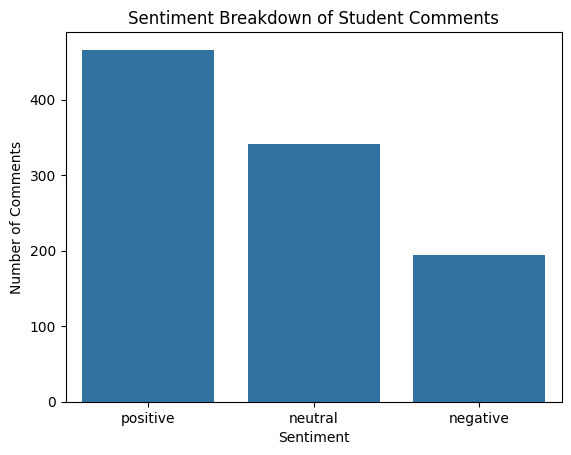

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Breakdown of Student Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

/tmp/ipython-input-4261891555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='coolwarm')


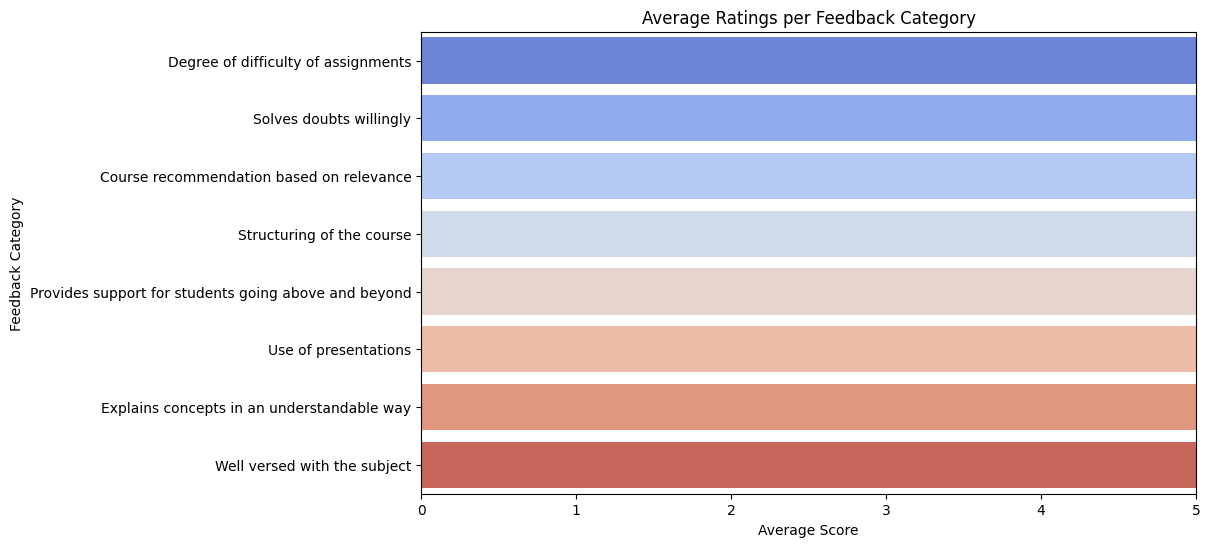

In [17]:
rating_columns = df.drop(columns=['S.No', 'Student ID', 'comments', 'sentiment', 'sentiment_label']).columns

avg_scores = df[rating_columns].mean().sort_values()

# Plot average ratings
plt.figure(figsize=(10,6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette='coolwarm')
plt.title('Average Ratings per Feedback Category')
plt.xlabel('Average Score')
plt.ylabel('Feedback Category')
plt.xlim(0, 5)
plt.show()

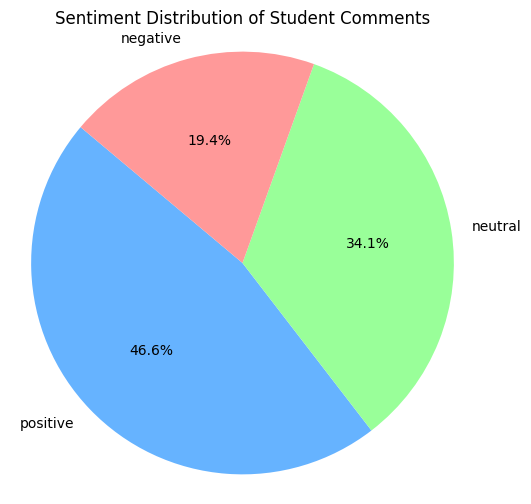

In [18]:
import matplotlib.pyplot as plt

# Count sentiment labels
sentiment_counts = df['sentiment_label'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Sentiment Distribution of Student Comments')
plt.axis('equal')
plt.show()

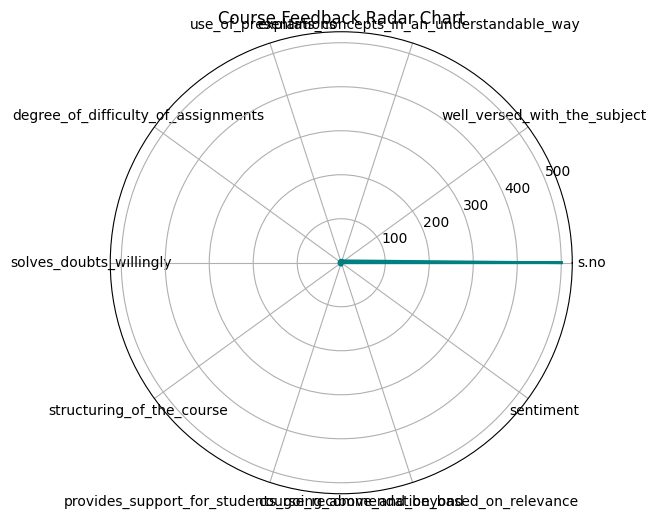

In [25]:
import matplotlib.pyplot as plt
import numpy as np

rating_columns = df.select_dtypes(include='number').columns.tolist()
exclude = ['s_no', 'student_id']
rating_columns = [col for col in rating_columns if col not in exclude]

# Calculate average scores
values = df[rating_columns].mean().tolist()
labels = rating_columns

# Radar setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='teal', linewidth=2)
ax.fill(angles, values, color='teal', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Course Feedback Radar Chart')
plt.show()

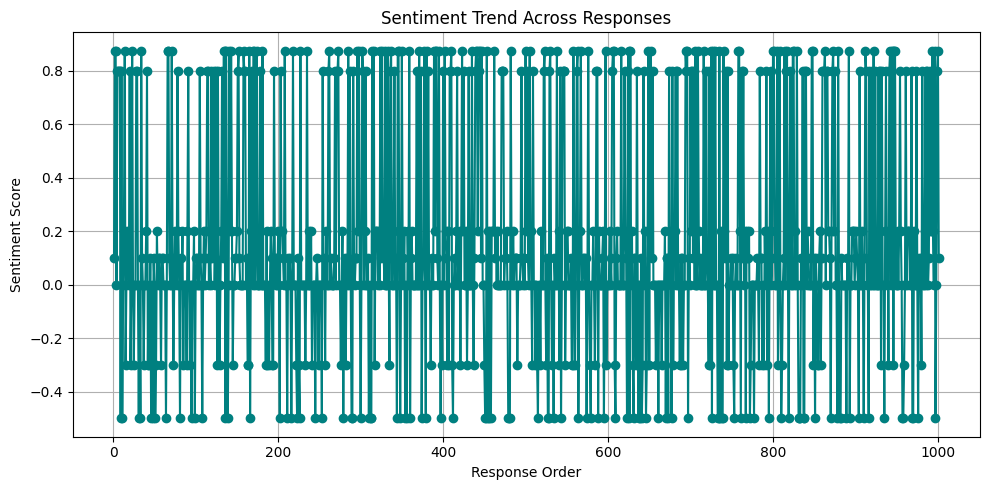

In [29]:
import matplotlib.pyplot as plt

# Use 's.no' or row index as a proxy for time
df['response_order'] = range(1, len(df) + 1)

plt.figure(figsize=(10,5))
plt.plot(df['response_order'], df['sentiment'], marker='o', linestyle='-', color='teal')
plt.title('Sentiment Trend Across Responses')
plt.xlabel('Response Order')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Average rating across all categories
avg_rating = df.select_dtypes(include='number').mean().mean()

# Sentiment breakdown
sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100

# Top keywords
from collections import Counter
import re

text = " ".join(df['comments'].dropna().astype(str).tolist())
words = re.findall(r'\b\w+\b', text.lower())
filtered_words = [word for word in words if word not in STOPWORDS and len(word) > 3]
top_keywords = Counter(filtered_words).most_common(5)

In [31]:
print(f"📊 Average Rating: {avg_rating:.2f}/5")
print("🗣 Sentiment Breakdown:")
for label, percent in sentiment_counts.items():
    print(f"   - {label.capitalize()}: {percent:.1f}%")

print("🔑 Top Keywords in Feedback:")
for word, count in top_keywords:
    print(f"   - {word} ({count} mentions)")

📊 Average Rating: 129.04/5
🗣 Sentiment Breakdown:
   - Positive: 46.6%
   - Neutral: 34.1%
   - Negative: 19.4%
🔑 Top Keywords in Feedback:
   - course (327 mentions)
   - instructor (233 mentions)
   - ended (120 mentions)
   - time (120 mentions)
   - topics (119 mentions)


In [19]:
!pip install wordcloud

In [20]:
text = " ".join(df['comments'].dropna().astype(str).tolist())

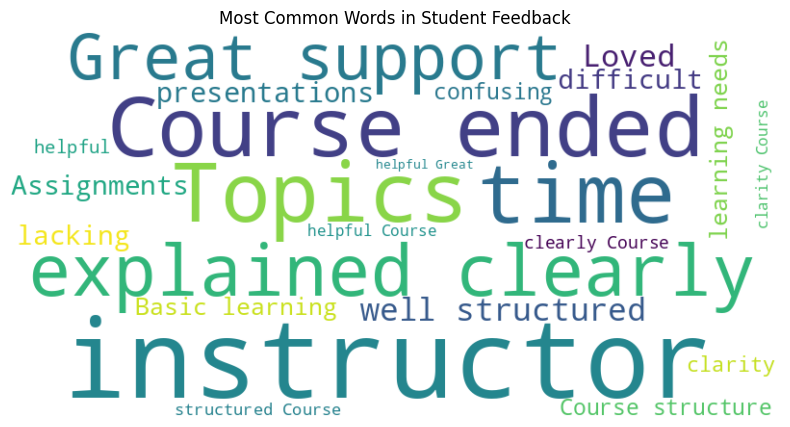

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Student Feedback')
plt.show()

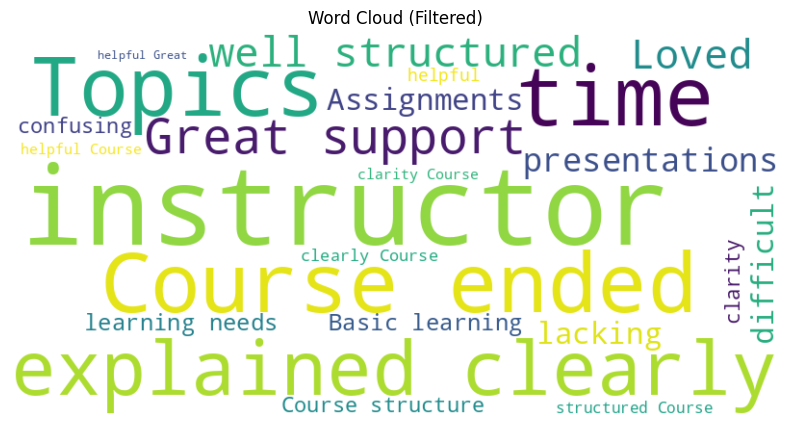

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all comments
text = " ".join(df['comments'].dropna().astype(str).tolist())

# Define stopwords
stopwords = set(STOPWORDS)

# Generate word cloud without stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, colormap='viridis').generate(text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Filtered)')
plt.show()